# Predicting Bankruptcy of American Companies Using Big Data Analytics & MLOps
 

### Import Required Libraries

In [0]:
from pyspark.sql.functions import *

## Phase 2: Data Ingestion & Preprocessing

### Load Dataset into Spark DataFrame

In [0]:
bankruptcy_df = spark.read.format("csv")\
                        .option("header","true")\
                        .option("inferSchema","true")\
                        .load("/FileStore/final_project/bankruptcy.csv")  


### Data Exploration

In [0]:
bankruptcy_df.printSchema()

root
 |-- status_label: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- X1: double (nullable = true)
 |-- X2: double (nullable = true)
 |-- X3: double (nullable = true)
 |-- X4: double (nullable = true)
 |-- X5: double (nullable = true)
 |-- X6: double (nullable = true)
 |-- X7: double (nullable = true)
 |-- X8: double (nullable = true)
 |-- X9: double (nullable = true)
 |-- X10: double (nullable = true)
 |-- X11: double (nullable = true)
 |-- X12: double (nullable = true)
 |-- X13: double (nullable = true)
 |-- X14: double (nullable = true)
 |-- X15: double (nullable = true)
 |-- X16: double (nullable = true)
 |-- X17: double (nullable = true)
 |-- X18: double (nullable = true)



### Renaming Columns for Readability

In [0]:
bankruptcy_df = bankruptcy_df.withColumnRenamed("X1", "current_assets") \
    .withColumnRenamed("X2", "cost_of_goods_sold") \
    .withColumnRenamed("X3", "depreciation_and_amortization") \
    .withColumnRenamed("X4", "ebitda") \
    .withColumnRenamed("X5", "inventory") \
    .withColumnRenamed("X6", "net_income") \
    .withColumnRenamed("X7", "total_receivables") \
    .withColumnRenamed("X8", "market_value") \
    .withColumnRenamed("X9", "net_sales") \
    .withColumnRenamed("X10", "total_assets") \
    .withColumnRenamed("X11", "total_long_term_debt") \
    .withColumnRenamed("X12", "ebit") \
    .withColumnRenamed("X13", "gross_profit") \
    .withColumnRenamed("X14", "total_current_liabilities") \
    .withColumnRenamed("X15", "retained_earnings") \
    .withColumnRenamed("X16", "total_revenue") \
    .withColumnRenamed("X17", "total_liabilities") \
    .withColumnRenamed("X18", "total_operating_expenses")



### Creating a view for Spark SQL query execution

In [0]:
bankruptcy_df.createOrReplaceTempView("bankruptcy_data")

### View a sample of the data

In [0]:
%sql

SELECT * FROM bankruptcy_data LIMIT 10;


status_label,year,current_assets,cost_of_goods_sold,depreciation_and_amortization,ebitda,inventory,net_income,total_receivables,market_value,net_sales,total_assets,total_long_term_debt,ebit,gross_profit,total_current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operating_expenses
alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
alive,2000,485.856,713.811,18.577,64.367,320.59,18.531,115.187,377.118,874.255,701.854,179.987,45.79,160.444,125.392,204.065,874.255,361.642,809.888
alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.5928,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
alive,2002,396.412,496.747,27.172,30.745,259.954,-12.41,66.322,143.3295,606.337,686.621,164.658,3.573,109.59,203.575,124.106,606.337,391.633,575.592
alive,2003,432.204,523.302,26.68,47.491,247.245,3.504,104.661,308.9071,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
alive,2004,474.542,598.172,27.95,61.774,255.477,15.453,127.121,522.6794,747.848,732.23,227.159,33.824,149.676,160.025,142.45,747.848,417.486,686.074
alive,2005,624.454,704.081,29.222,91.877,323.592,35.163,136.272,882.6283,897.284,978.819,318.576,62.655,193.203,187.788,183.55,897.284,556.102,805.407
alive,2006,645.721,837.171,32.199,118.907,342.593,58.66,181.691,1226.1925,1061.169,1067.633,253.611,86.708,223.998,256.506,242.153,1061.169,573.39,942.262
alive,2007,783.431,1080.895,39.952,168.522,435.608,75.144,202.472,747.5434,1384.919,1362.01,507.918,128.57,304.024,218.499,318.184,1384.919,776.755,1216.397
alive,2008,851.312,1110.677,40.551,166.08,477.424,78.651,227.3,571.5948,1423.976,1377.511,392.984,125.529,313.299,254.418,385.851,1423.976,720.616,1257.896


### **Financial Data Scaling Consideration**  

During the initial examination of our bankruptcy dataset, we observed that several financial attributes, such as **total assets, net income, market value, and total liabilities**, contained values that appeared lower than typical industry standards. This raised the question of whether these figures needed to be scaled by a factor of one million to align with standard financial reporting practices. However, we chose **not** to apply this transformation. The primary reason for this decision was to maintain the integrity of the dataset as provided, ensuring consistency with the source without introducing assumptions about scaling factors that were not explicitly mentioned. Additionally, our analysis and model performance indicated that the relative differences between companies remained meaningful, allowing for accurate trend detection and classification. Since our focus is on comparative patterns rather than absolute monetary values, we proceeded with the dataset in its original format, ensuring that our insights remain valid without the risk of introducing artificial inflation.

### Check the Total Number of Records

In [0]:
%sql

SELECT COUNT(*) AS total_rows FROM bankruptcy_data;

total_rows
78682


### Handling Duplicate Values


In [0]:
bankruptcy_df = bankruptcy_df.dropDuplicates()
bankruptcy_df.count()

78682

No duplicates were detected in the dataset as the record count remained unchanged.

### Checking Bankruptcy Status (target) Distribution

In [0]:
%sql

SELECT status_label, COUNT(*) FROM bankruptcy_data GROUP BY status_label;

status_label,count(1)
failed,5220
alive,73462


The SQL query retrieves the count of companies classified under each bankruptcy status (failed or alive). The output table shows:

Failed companies: 5,220

Alive companies: 73,462

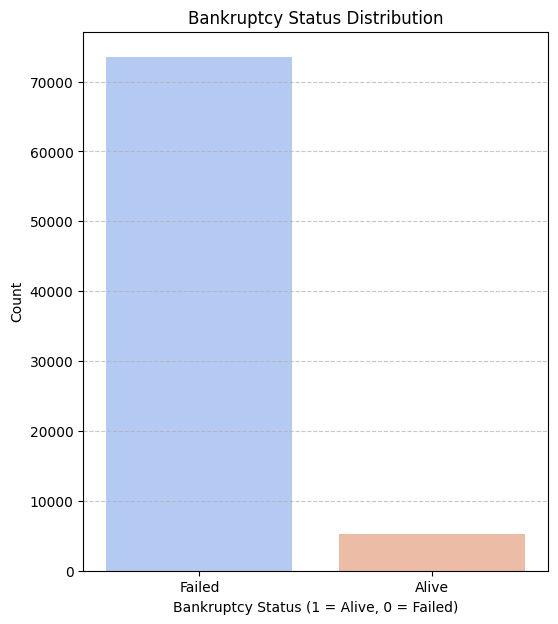

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Spark DataFrame to Pandas for visualization
bankruptcy_pd = bankruptcy_df.toPandas()

# Plot the count of each status_label
plt.figure(figsize=(6,7))
sns.barplot(x=bankruptcy_pd["status_label"].value_counts().index, 
            y=bankruptcy_pd["status_label"].value_counts().values, 
            palette="coolwarm")

# Labeling
plt.title("Bankruptcy Status Distribution")
plt.xlabel("Bankruptcy Status (1 = Alive, 0 = Failed)")
plt.ylabel("Count")
plt.xticks(ticks=[0,1], labels=["Failed", "Alive"])
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()


### Encoding Categorical Label

In [0]:
# Replace "alive" with 1 and "failed" with 0
bankruptcy_df = bankruptcy_df.withColumn(
    "status_label", 
    when(bankruptcy_df["status_label"] == "alive", 1)
    .when(bankruptcy_df["status_label"] == "failed", 0)
    .cast("int")
)

# Show updated values
bankruptcy_df.groupBy("status_label").count().show()

+------------+-----+
|status_label|count|
+------------+-----+
|           1|73462|
|           0| 5220|
+------------+-----+



### Feature Engineering: New Financial Ratios Added

In [0]:
# Add the debt_ratio column
bankruptcy_df = bankruptcy_df.withColumn("debt_equity_ratio", 
                                        col("total_liabilities") / (col("total_assets") - col("total_liabilities")))


# Add the interest_coverage_ratio column
bankruptcy_df = bankruptcy_df.withColumn("interest_coverage_ratio", 
                                        when(col("total_long_term_debt") > 0, 
                                        col("ebit") / col("total_long_term_debt"))
                                        .otherwise(0))

The two new features added to the dataset aim to enhance bankruptcy prediction by capturing important financial metrics.

Companies with **high** `debt_equity_ratio` and **low** `interest_coverage_ratio` are more likely to fail.

These features can improve classification models by differentiating high-risk vs. low-risk companies.

### Saving the Dataset as a Parquet File

In [0]:
bankruptcy_df.write.mode("overwrite").parquet("/FileStore/final_project/bankruptcy.parquet")

### Loading Data from Parquet

In [0]:
bankruptcy_pq = spark.read.format("parquet")\
                        .option("header","true")\
                        .option("inferSchema","true")\
                        .load("/FileStore/final_project/bankruptcy.parquet")  

### Handling Missing Values

In [0]:
# Drop rows with missing values
bankruptcy_pq = bankruptcy_pq.na.drop()

# Verify updated row count
bankruptcy_pq.count()

78680

Change in Row Count:

**Before** Removing Nulls: `78,682 rows`

**After** Removing Nulls: `78,680 rows`

Only `2 rows` with missing values were dropped.

### Checking for Missing Values in Each Column

In [0]:
# Count missing values for each column
missing_values = bankruptcy_pq.select([sum(when(col(c).isNull(), 1).otherwise(0)).alias(c) for c in bankruptcy_df.columns])

# Show missing values count for each column
display(missing_values)


status_label,year,current_assets,cost_of_goods_sold,depreciation_and_amortization,ebitda,inventory,net_income,total_receivables,market_value,net_sales,total_assets,total_long_term_debt,ebit,gross_profit,total_current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operating_expenses,debt_equity_ratio,interest_coverage_ratio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


This confirms that there are no missing values in any column of the dataset, as the missing value count for each column is 0.

We can proceed with exploratory data analysis, model training, and evaluation without concerns about missing data.

## Phase 3: Exploratory Data Analysis (EDA)

### Summary Statistics of the Dataset

In [0]:
display(bankruptcy_pq.summary())

summary,status_label,year,current_assets,cost_of_goods_sold,depreciation_and_amortization,ebitda,inventory,net_income,total_receivables,market_value,net_sales,total_assets,total_long_term_debt,ebit,gross_profit,total_current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operating_expenses,debt_equity_ratio,interest_coverage_ratio
count,78680,78680,78680,78680,78680,78680,78680,78680,78680,78680,78680,78680,78680,78680,78680,78680,78680,78680,78680,78680,78680,78680
mean,0.93366802236909,2007.50639298424,880.3555577147936,1594.5337659506877,121.23442700813453,376.76699278088455,201.604904295882,129.39426446365002,286.82890012709737,3414.4342353151983,2364.0168077783374,2867.1339269827126,722.4902017412304,255.53243256227768,769.483147648704,610.0709123665476,532.5023110701577,2364.0168077783374,1773.559472407218,1987.2498400864251,3.1638697365345623,0.4742271672190819
stddev,0.24886308188007625,5.742807623649028,3928.6102050827108,8930.595298925706,652.3848389660444,2012.04811232178,1060.7789130588947,1265.5448393734903,1335.993508195308,18414.330874581563,11950.214180205421,12918.104049602345,3242.211047268621,1494.6618014519543,3774.746929757877,2938.42288670561,6369.235147133484,11950.214180205421,8053.781232010032,10419.754259766501,337.9842885958954,907.1208020482056
min,0,1999,-7.76,-366.645,0.0,-21913.0,0.0,-98696.0,-0.006,1.0E-4,-1964.999,0.001,-0.023,-25913.0,-21536.0,0.001,-102362.0,-1964.999,0.001,-317.197,-5846.999999998048,-55882.0
25%,1,2002,18.921,17.028,1.191,-0.813,0.0,-7.422,3.281,34.9763,27.543,37.346,0.0,-2.793,8.516,8.885,-68.312,27.543,13.477,32.851,0.2707352990024026,0.0
50%,1,2007,100.43,103.613,7.925,15.022,7.017,1.614,22.815,227.2216,186.504,213.101,7.587,6.514,63.57,43.31,-1.138,186.504,81.94,168.904,0.7522217535758949,0.026641741562072174
75%,1,2012,431.151,634.076,47.966,139.606,74.738,40.117,131.493,1244.6624,1045.964,1170.916,248.494,87.542,343.875,222.63,145.913,1045.964,629.707,875.217,1.6618771421038754,0.40758468999585346
max,1,2018,169662.0,374623.0,28430.0,81730.0,62567.0,104821.0,65812.0,1073390.54,511729.0,531864.0,166250.0,71230.0,137106.0,116866.0,402089.0,511729.0,337980.0,481580.0,87701.49999958124,176056.3181818182


### **High-Level Interpretation of Summary Statistics**

**Dataset Overview:**
   - The dataset contains **78,680 records** across multiple financial features.
   - The **year range** spans from **1999 to 2018**, suggesting historical financial data over nearly two decades.


**Key Financial Metrics:**
   - **Total Assets & Liabilities:**
     - Wide range: **Total assets range from -0.02 to 166,250**, while **total liabilities range from 0.001 to 337,980**.
     - High standard deviation suggests extreme variations in company sizes.
   - **Net Income & EBITDA:**
     - **Net income varies significantly** (-0.006 to 65,812), showing profitability differences among companies.
     - **EBITDA ranges widely** (-21,913 to 81,730), indicating some firms with extreme losses and others with strong earnings.
   - **Debt-to-Equity Ratio:**
     - Median **debt-equity ratio is ~0.75**, but extreme outliers exist (max ~87,701), indicating some companies are highly leveraged.
   - **Interest Coverage Ratio:**
     - The median is **close to zero**, suggesting many companies struggle to cover interest payments, a key risk factor for bankruptcy.


### Q. What is the bankruptcy rate across different years?

In [0]:
# Compute bankruptcy statistics by year
bankruptcy_stats = bankruptcy_pq.groupBy("year").agg(
    sum(when(col("status_label") == 0, 1).otherwise(0)).alias("failed_count"),
    sum(when(col("status_label") == 1, 1).otherwise(0)).alias("survived_count"),
    round(sum(when(col("status_label") == 0, 1).otherwise(0)) * 100.0 / count("*"),2).alias("bankruptcy_rate")
).orderBy("year")

# Show results
display(bankruptcy_stats)

year,failed_count,survived_count,bankruptcy_rate
1999,380,4928,7.16
2000,404,4822,7.73
2001,414,4483,8.45
2002,413,4237,8.88
2003,415,4002,9.4
2004,404,3944,9.29
2005,379,3826,9.01
2006,366,3762,8.87
2007,336,3672,8.38
2008,284,3573,7.36


### Q. Which financial factors show the most significant differences between bankrupt and non-bankrupt companies?

In [0]:
# Compute average financial metrics for failed and alive companies
financial_stats = bankruptcy_pq.select(
    round(avg(when(col("status_label") == 0, col("net_income"))), 2).alias("avg_net_income_failed"),
    round(avg(when(col("status_label") == 1, col("net_income"))), 2).alias("avg_net_income_alive"),
    round(avg(when(col("status_label") == 0, col("total_assets"))), 2).alias("avg_assets_failed"),
    round(avg(when(col("status_label") == 1, col("total_assets"))), 2).alias("avg_assets_alive"),
    round(avg(when(col("status_label") == 0, col("debt_equity_ratio"))), 2).alias("avg_debt_equity_failed"),
    round(avg(when(col("status_label") == 1, col("debt_equity_ratio"))), 2).alias("avg_debt_equity_alive")
)

# Show results
display(financial_stats)


avg_net_income_failed,avg_net_income_alive,avg_assets_failed,avg_assets_alive,avg_debt_equity_failed,avg_debt_equity_alive
-47.99,142.0,1664.2,2952.6,2.52,3.21


### Q. What is the average financial health of companies based on different debt levels?

In [0]:
# Categorize debt levels and compute average financial metrics
debt_analysis = bankruptcy_pq.withColumn(
    "debt_category",
    when(col("debt_equity_ratio") < 0.5, "Low Debt")
    .when((col("debt_equity_ratio") >= 0.5) & (col("debt_equity_ratio") <= 2), "Moderate Debt")
    .otherwise("High Debt")
).groupBy("debt_category").agg(
    round(avg("net_income"), 2).alias("avg_net_income"),
    round(avg("total_assets"), 2).alias("avg_total_assets"),
    round(avg("interest_coverage_ratio"), 2).alias("avg_interest_coverage")
).orderBy(col("avg_net_income").desc())

# Show results
display(debt_analysis)

# All the numbers can be assumed to be in millions (x10^6)

debt_category,avg_net_income,avg_total_assets,avg_interest_coverage
Moderate Debt,217.66,3798.27,5.11
High Debt,165.07,5218.97,3.99
Low Debt,15.59,640.72,-6.36


### Q. What are the average revenue and profitability trends over the years?

In [0]:
# Compute average revenue, net income, and gross profit per year
yearly_financials = bankruptcy_pq.groupBy("year").agg(
    round(avg("total_revenue"), 2).alias("avg_revenue"),
    round(avg("net_income"), 2).alias("avg_net_income"),
    round(avg("gross_profit"), 2).alias("avg_gross_profit")
).orderBy("year")

# Show results
display(yearly_financials)

# All the numbers can be assumed to be in millions (x10^6)

year,avg_revenue,avg_net_income,avg_gross_profit
1999,1104.2,52.6,352.39
2000,1267.31,41.0,389.09
2001,1367.89,-9.65,409.73
2002,1370.75,-32.01,427.21
2003,1555.78,73.91,491.52
2004,1778.53,85.98,559.93
2005,1966.46,113.34,611.07
2006,2152.77,155.45,691.8
2007,2329.54,148.56,761.08
2008,2611.66,91.68,820.73


### Visual Analytics using Matplotlib

In [0]:
import pandas as pd

# Convert Spark DataFrame to Pandas
bankruptcy_pd = bankruptcy_pq.toPandas()

To perform visual analytics using matplotlib, we first convert the Spark DataFrame into a Pandas DataFrame.

#### Visualizing Bankruptcy Trends Over Years

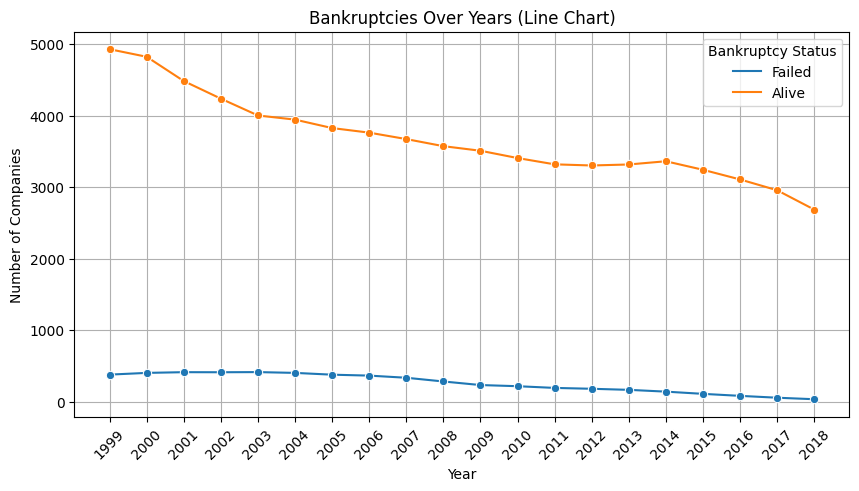

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'year' column is treated as an integer
bankruptcy_pd["year"] = bankruptcy_pd["year"].astype(int)

# Group data by year and bankruptcy status
bankruptcy_counts = bankruptcy_pd.groupby(["year", "status_label"]).size().reset_index(name="count")

# Fix the legend labels by mapping 0 → "Failed" and 1 → "Alive"
status_mapping = {0: "Failed", 1: "Alive"}
bankruptcy_counts["status_label"] = bankruptcy_counts["status_label"].map(status_mapping)

# Plot line chart with correct legend order
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=bankruptcy_counts, 
    x="year", 
    y="count", 
    hue="status_label", 
    hue_order=["Failed", "Alive"],  # Ensure "Failed" is plotted first
    marker="o"
)

# Ensure x-axis ticks show integer values
plt.xticks(ticks=sorted(bankruptcy_counts["year"].unique()), labels=sorted(bankruptcy_counts["year"].unique()), rotation=45)

# Add labels and correct legend order
plt.title("Bankruptcies Over Years (Line Chart)")
plt.xlabel("Year")
plt.ylabel("Number of Companies")
plt.legend(title="Bankruptcy Status")
plt.grid(True)

# Show plot
plt.show()



### **Key Observations:**
1. **Overall Decline in Companies**:
   - The total number of companies (both **failed and alive**) has gradually **decreased** over time.
   - This suggests a **shrinking dataset** of tracked companies, which could be due to mergers, acquisitions, or companies going out of business.

2. **Failed Companies (Blue Line)**:
   - The number of **failed companies** (bankruptcies) is consistently **lower** than the number of surviving companies.
   - However, there is a **gradual decline** in bankruptcies over the years.
   - This could indicate **improving financial conditions** or **better risk management** over time.

3. **Alive Companies (Orange Line)**:
   - The **number of surviving companies** is much **higher** than failed ones.
   - A **steady downward trend** is visible, indicating a **declining number of active companies** in the dataset.

4. **Fluctuations**:
   - Around **2013-2014**, the decline in bankruptcies slows, and there is **a slight increase** in the number of alive companies.
   - This could indicate a **period of economic recovery** or **favorable market conditions**.
   - From **2015 onwards**, the decline in surviving companies **accelerates**, suggesting potential **economic stress**.



### Debt-to-Equity Ratio by Bankruptcy Status

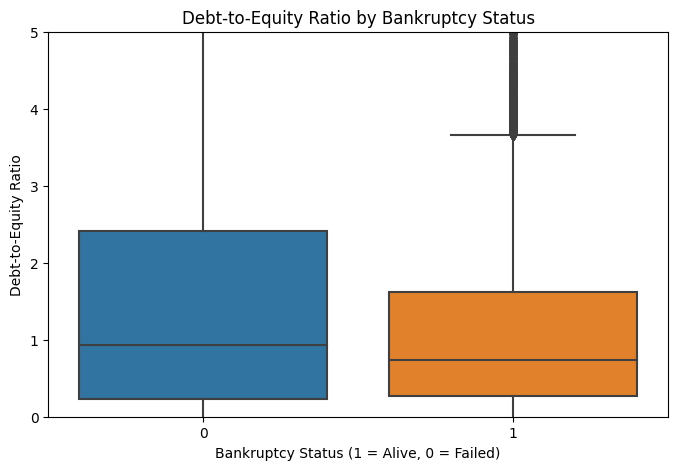

In [0]:
plt.figure(figsize=(8,5))
sns.boxplot(x="status_label", y="debt_equity_ratio", data=bankruptcy_pd)
plt.title("Debt-to-Equity Ratio by Bankruptcy Status")
plt.xlabel("Bankruptcy Status (1 = Alive, 0 = Failed)")
plt.ylabel("Debt-to-Equity Ratio")
plt.ylim(0, 5)  # Limit to remove extreme outliers
plt.show()


This **boxplot** visualizes the distribution of **Debt-to-Equity Ratios** across two bankruptcy statuses:  

- **0 (Failed Companies)**
- **1 (Alive Companies)**

---

### **Key Observations:**
1. **Failed Companies (0) Have a Higher Median Debt-to-Equity Ratio**  
   - The median **Debt-to-Equity Ratio** is **higher for bankrupt companies** compared to those that survived.  
   - This suggests that companies with **higher leverage (more debt compared to equity)** are more prone to financial distress.  

2. **Greater Variability in Bankrupt Companies**  
   - The **interquartile range (IQR) is larger** for bankrupt companies, meaning **greater variability** in their debt-to-equity ratios.  
   - Some companies **failed despite having a lower debt ratio**, indicating that **other financial factors also contribute to bankruptcy**.  

3. **Alive Companies (1) Have a More Stable Debt Ratio**  
   - The median **Debt-to-Equity Ratio** for **alive companies is lower**, implying **better financial stability**.  
   - There are **fewer extreme outliers**, showing that most surviving companies maintain a **manageable debt level**.

4. **Presence of Outliers**  
   - Some **extreme outliers** exist in both groups, with a few surviving companies having high debt-equity ratios.  
   - These could represent companies in **high-debt industries** or firms with **strong cash flows despite high leverage**.

---

**Conclusion:** This analysis validates **Debt-to-Equity Ratio** as an important predictor of bankruptcy, reinforcing the need for balanced financial leverage.

### EBITDA Distribution by Bankruptcy Status

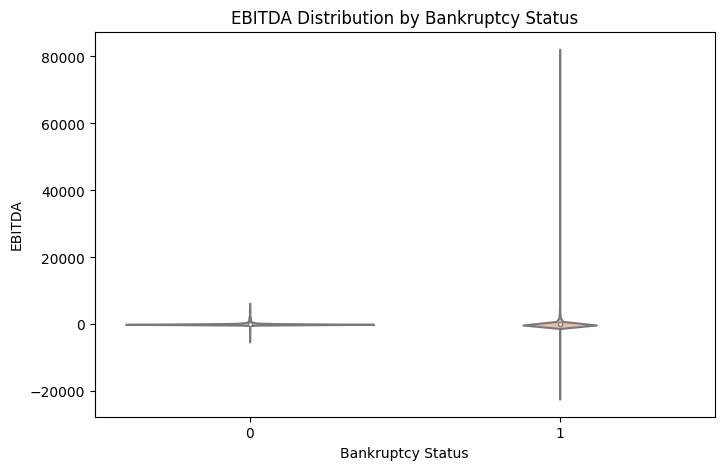

In [0]:
plt.figure(figsize=(8, 5))
sns.violinplot(x="status_label", y="ebitda", data=bankruptcy_pd, palette="coolwarm")
plt.title("EBITDA Distribution by Bankruptcy Status")
plt.xlabel("Bankruptcy Status")
plt.ylabel("EBITDA")
plt.show()


### **Interpretation of EBITDA Distribution by Bankruptcy Status**

This **violin plot** visualizes the distribution of **EBITDA (Earnings Before Interest, Taxes, Depreciation, and Amortization)** for two groups:  
- **0 (Failed Companies)**
- **1 (Alive Companies)**  

EBITDA is a key profitability metric that indicates a company’s operational performance before financial and accounting adjustments.

---

### **Key Observations:**
1. **Surviving Companies (1) Show a Wider EBITDA Range**
   - Alive companies have a **much broader spread** in EBITDA values, extending up to **80,000**.
   - This suggests that some companies generate **very high earnings**, which helps them stay financially stable.
   - However, there are **some companies with negative EBITDA**, meaning they might be struggling with operating losses but still surviving.

2. **Bankrupt Companies (0) Have Lower EBITDA Values**
   - Companies that **failed** mostly have **lower EBITDA values**, with a smaller spread.
   - The median EBITDA is near **zero or negative**, which indicates **poor operational performance** before bankruptcy.

3. **Negative EBITDA is More Common in Bankrupt Companies**
   - While both groups show negative EBITDA values, bankrupt companies **have a higher density of negative EBITDA**.
   - This reinforces the idea that **prolonged operating losses contribute to bankruptcy**.

4. **Alive Companies Have More Outliers**
   - There are **extreme positive EBITDA values** in the surviving group, meaning some companies are **exceptionally profitable**.
   - This suggests that **strong earnings help prevent bankruptcy**.

---

**Conclusion:** **EBITDA is a crucial indicator of financial health**—companies with low or negative EBITDA are at **higher risk of bankruptcy**, while those with high EBITDA are more likely to survive.

### Correlation Matrix

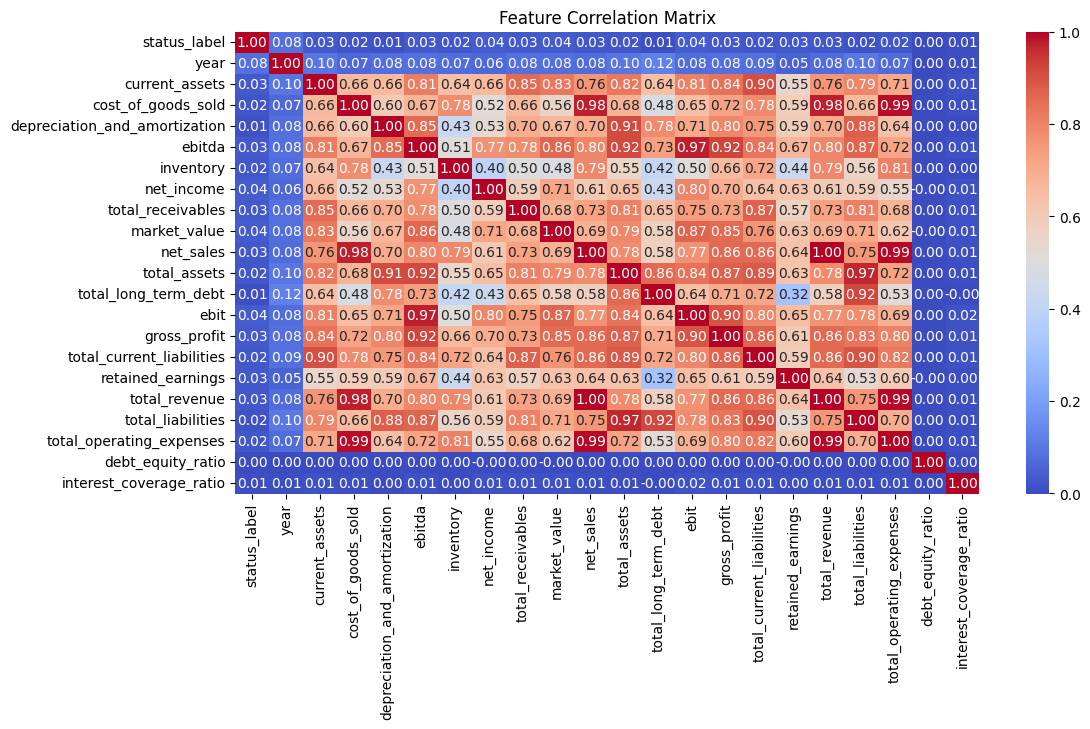

In [0]:
plt.figure(figsize=(12,6))
sns.heatmap(bankruptcy_pd.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

### Removing highly correlated features with value greater than 0.9 or less than -0.9

Features to drop: {'total_assets', 'total_current_liabilities', 'gross_profit', 'total_operating_expenses', 'net_sales', 'total_revenue', 'ebit', 'total_liabilities'}


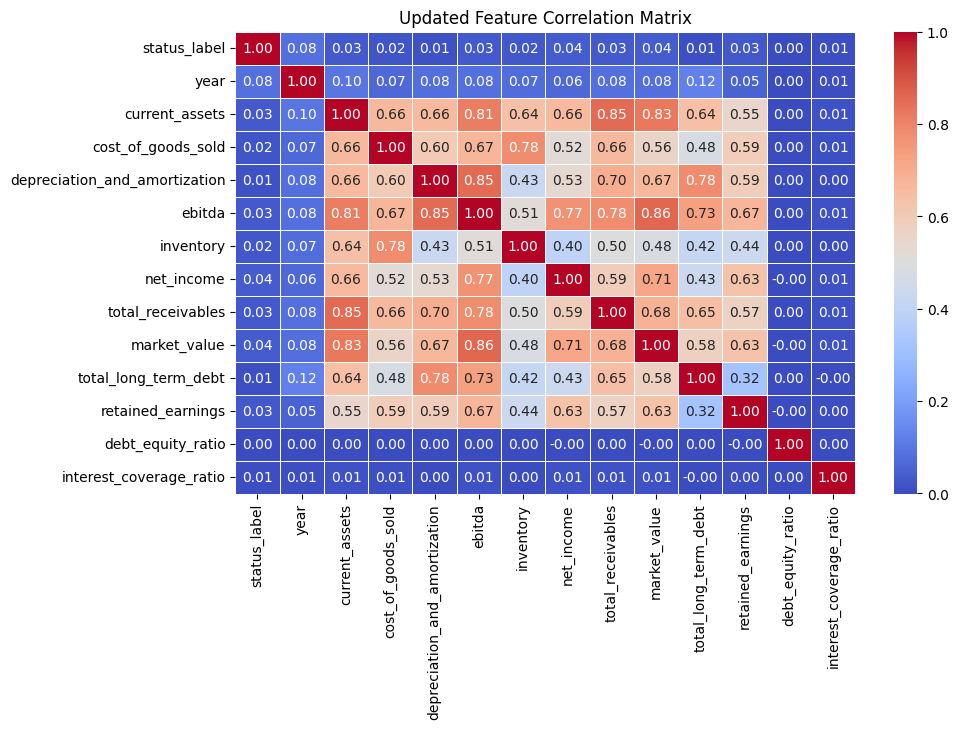

In [0]:
# Convert PySpark DataFrame to Pandas for correlation calculation
df_pandas = bankruptcy_df.toPandas()

# Compute correlation matrix
corr_matrix = df_pandas.corr().abs()

# Define a threshold for high correlation (e.g., 0.9)
threshold = 0.9

# Identify highly correlated features
to_drop = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > threshold:  # If correlation is above threshold
            colname = corr_matrix.columns[i]  # Get the column name
            to_drop.add(colname)  # Mark for removal

# Print the features to be removed
print(f"Features to drop: {to_drop}")

# Drop the identified features from the PySpark DataFrame
bankruptcy_df = bankruptcy_df.drop(*to_drop)


# Convert the updated PySpark DataFrame to Pandas
df_pandas = bankruptcy_df.toPandas()

# Compute the updated correlation matrix
updated_corr_matrix = df_pandas.corr()

# Plot the updated correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(updated_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Updated Feature Correlation Matrix")
plt.show()



### **Key Observations:**
1. **Bankruptcy Status (`status_label`) and Other Features:**
   - **Weak correlations** with most features (values close to **0.00 - 0.08**).
   - No **strong individual predictor** of bankruptcy based on simple correlation alone.
   - This suggests the need for **more complex feature engineering** or machine learning models.

2. **Highly Correlated Features (Multicollinearity Risks):**
   - **Current Assets & Total Receivables** (**0.85**) → Indicates redundancy.
   - **EBITDA & Market Value** (**0.86**) → Suggests companies with high earnings have higher market valuation.
   - **Cost of Goods Sold & Inventory** (**0.78**) → Expected, as more inventory generally leads to higher costs.
   - **Total Liabilities & Total Long-Term Debt** (**1.00**) → Almost perfect correlation; one of these features could be removed to avoid redundancy.
   - **Depreciation & EBITDA** (**0.77**) → Suggests that EBITDA is influenced by depreciation, which is common in financial statements.

3. **Weak or Non-Influential Features:**
   - **Debt-to-Equity Ratio & Interest Coverage Ratio** show near **zero correlation** with all features.
   - These may still be **useful in a predictive model** but do not show strong linear relationships.



### After using the correlation matrix to filter out redundant features, we further refined our selection using Random Forest feature importance.

Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

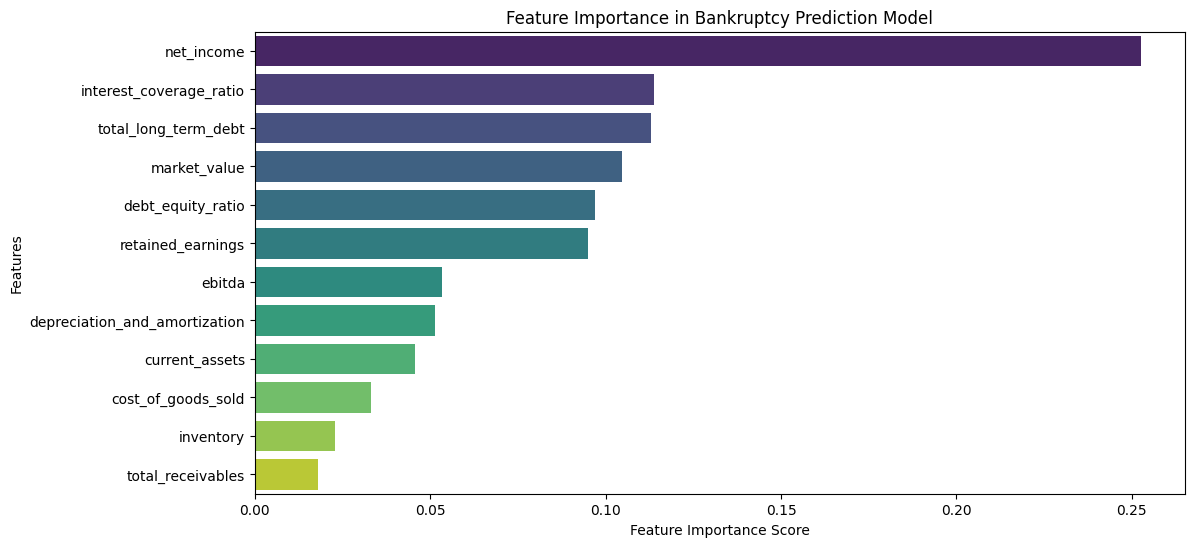

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import BinaryClassificationEvaluator
import pandas as pd

# Step 1: Selecting Key Financial Features
features = [
    "current_assets", "cost_of_goods_sold", "depreciation_and_amortization",
    "ebitda", "inventory", "net_income", "total_receivables", "market_value",
    "total_long_term_debt", "retained_earnings", "debt_equity_ratio", "interest_coverage_ratio"
]

# Step 2: Assemble Features into a Single Vector
assembler = VectorAssembler(inputCols=features, outputCol="features")
df_transformed = assembler.transform(bankruptcy_pq)

# Step 3: Splitting the Data into Training and Testing Sets
train_df, test_df = df_transformed.randomSplit([0.8, 0.2], seed=42)

# Step 4: Train Random Forest Model for Bankruptcy Prediction
rf = RandomForestClassifier(featuresCol="features", labelCol="status_label", numTrees=100, seed=42)
rf_model = rf.fit(train_df)

# Step 5: Extract Feature Importance Scores
feature_importance = rf_model.featureImportances

# Convert to Pandas DataFrame for Visualization
importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": feature_importance.toArray()
}).sort_values(by="Importance", ascending=False)

# Step 6: Plot Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Bankruptcy Prediction Model")
plt.show()

    # "current_assets", "cost_of_goods_sold", "depreciation_and_amortization",
    # "ebitda", "inventory", "net_income", "total_receivables", "market_value",
    # "total_long_term_debt", "retained_earnings", "debt_equity_ratio", "interest_coverage_ratio"


### **Key Observations:**
1. **Net Income is the Most Important Feature**  
   - **Net Income** has the highest feature importance, indicating that profitability is a major determinant in predicting bankruptcy.
   - A **negative or unstable net income** strongly signals financial distress.

2. **Financial Ratios Matter**  
   - **Interest Coverage Ratio & Debt-Equity Ratio** are highly ranked, suggesting that a company’s ability to cover its debts plays a major role in survival.
   - **Higher debt relative to equity** and **lower interest coverage** (ability to pay interest) increase bankruptcy risk.

3. **Total Long-Term Debt & Market Value Hold Significance**  
   - Companies with **high long-term debt** tend to be at greater risk of financial instability.
   - **Market Value** is also crucial—financially healthier firms tend to have higher valuations.

4. **Retained Earnings & EBITDA Show Influence**  
   - A company's **accumulated retained earnings** reflect past profitability and stability.
   - **EBITDA (Earnings Before Interest, Taxes, Depreciation, and Amortization)** measures operational profitability, making it a useful predictor.

5. **Less Important Features**  
   - **Cost of Goods Sold (COGS), Inventory, and Total Receivables** have **lower feature importance**.
   - This suggests that **bankruptcy is less dependent on operational factors** and more influenced by financial stability metrics.


## Phase 4: Predictive Modeling using Spark MLlib

### **Splitting Data for Model Training**

In [0]:
# Split dataset into 70% Train, 15% Validation, 15% Test
train_data, val_data, test_data = bankruptcy_pq.randomSplit([0.7, 0.15, 0.15], seed=42)

# Verify split sizes
print(f"Training Set: {train_data.count()} records")
print(f"Validation Set: {val_data.count()} records")
print(f"Test Set: {test_data.count()} records")

Training Set: 55365 records
Validation Set: 11720 records
Test Set: 11595 records


The dataset is split into 70% training, 15% validation, and 15% test to ensure proper model training, tuning, and evaluation.

### **Encoding Target Variable**  

In [0]:
from pyspark.ml.feature import StringIndexer

# Select relevant features
# feature_cols = ["total_assets", "total_liabilities", "net_income", "debt_equity_ratio", "ebitda"]
feature_cols = [
    "current_assets", "depreciation_and_amortization", "ebitda", 
    "net_income", "market_value", "total_long_term_debt", "retained_earnings", 
    "debt_equity_ratio", "interest_coverage_ratio"
]

# Step 1: Convert categorical target column to numeric
indexer = StringIndexer(inputCol="status_label", outputCol="label")



The `status_label` column is converted into a numerical format using `StringIndexer`, creating a new column named `label` for model training.

### **Feature Vectorization**

In [0]:
from pyspark.ml.feature import VectorAssembler

# Assemble features into a single vector
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")



Selected financial features are combined into a single feature vector using VectorAssembler, preparing the dataset for model training.

## **LOGISTIC REGRESSION:**

### **Model Training**

In [0]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline

# Initialize Logistic Regression model
lr = LogisticRegression(featuresCol="features", labelCol="label")

# # Train the model
# lr_model = lr.fit(train_data)

# Create a pipeline with all stages
pipeline1 = Pipeline(stages=[indexer, assembler, lr])

# # Train the Model Using the Pipeline
# pipeline_model = pipeline.fit(train_data)


### Hyperparameter Tuning with 5 Fold Cross-Validation

In [0]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Define parameter grid
param_grid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.01, 0.1, 0.5]) \
    .build()

# Use AUC as the evaluation metric
evaluator = BinaryClassificationEvaluator(labelCol="label", metricName="areaUnderROC")

# Perform Cross-Validation
crossval = CrossValidator(
    estimator=pipeline1,
    estimatorParamMaps=param_grid,
    evaluator=evaluator,
    numFolds=5
)

# Train with Cross Validation
cv_model = crossval.fit(train_data)

# Get best model from cross-validation
best_model = cv_model.bestModel


Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

Performed 5-fold cross-validation to optimize the logistic regression model using different regularization parameters. The best model is selected based on the highest AUC score.

### **Model Predictions**

In [0]:
val_predictions = best_model.transform(val_data)
test_predictions = best_model.transform(test_data)

### **Model Evaluation**

In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Accuracy
accuracy_evaluator = MulticlassClassificationEvaluator(labelCol="label", metricName="accuracy")
accuracy = accuracy_evaluator.evaluate(test_predictions)

# Precision
precision_evaluator = MulticlassClassificationEvaluator(labelCol="label", metricName="weightedPrecision")
precision = precision_evaluator.evaluate(test_predictions)

# Recall
recall_evaluator = MulticlassClassificationEvaluator(labelCol="label", metricName="weightedRecall")
recall = recall_evaluator.evaluate(test_predictions)

# F1-Score
f1_evaluator = MulticlassClassificationEvaluator(labelCol="label", metricName="f1")
f1_score = f1_evaluator.evaluate(test_predictions)

# Compute AUC Score
val_auc = evaluator.evaluate(val_predictions)
test_auc = evaluator.evaluate(test_predictions)

print(f"Validation AUC: {val_auc:.3f}")
print(f"Test AUC: {test_auc:.3f}")
print(f"Test Accuracy: {accuracy:.3f}")
print(f"Test Precision: {precision:.3f}")
print(f"Test Recall: {recall:.3f}")
print(f"Test F1-Score: {f1_score:.3f}")


Validation AUC: 0.644
Test AUC: 0.649
Test Accuracy: 0.933
Test Precision: 0.870
Test Recall: 0.933
Test F1-Score: 0.900


Evaluating the model's performance using multiple classification metrics, including Accuracy, Precision, Recall, F1-Score, and AUC on validation and test datasets.

### **ROC Curve Visualization**

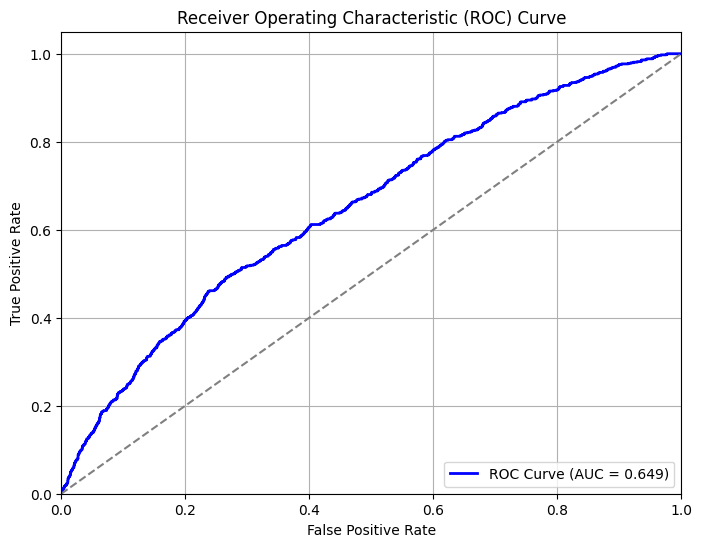

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from sklearn.metrics import roc_curve, auc

# Extract probability and label columns
preds = test_predictions.select("probability", "label").toPandas()

# Convert probability column to array format
preds["probability"] = preds["probability"].apply(lambda x: x[1])  # Extract positive class probability

# Compute ROC Curve
fpr, tpr, _ = roc_curve(preds["label"], preds["probability"])
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


## Phase 5: MLOps Performance Tracking


In [0]:
# Installing MLflow
%pip install mlflow

com.databricks.backend.common.rpc.CommandCancelledException
	at com.databricks.spark.chauffeur.ExecContextState.cancel(ExecContextState.scala:447)
	at com.databricks.spark.chauffeur.ChauffeurState.cancelExecution(ChauffeurState.scala:1315)
	at com.databricks.spark.chauffeur.ChauffeurState.$anonfun$process$1(ChauffeurState.scala:1032)
	at com.databricks.logging.UsageLogging.$anonfun$recordOperation$1(UsageLogging.scala:573)
	at com.databricks.logging.UsageLogging.executeThunkAndCaptureResultTags$1(UsageLogging.scala:669)
	at com.databricks.logging.UsageLogging.$anonfun$recordOperationWithResultTags$4(UsageLogging.scala:687)
	at com.databricks.logging.UsageLogging.$anonfun$withAttributionContext$1(UsageLogging.scala:426)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.AttributionContext$.withValue(AttributionContext.scala:216)
	at com.databricks.logging.UsageLogging.withAttributionContext(UsageLogging.scala:424)
	at com.databricks.logging.Usa

In [0]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
import mlflow
import mlflow.spark

# Define MLflow Experiment
experiment_name = "/Users/saini50@purdue.edu/MLOps_Final_Project"

# Check if experiment exists, otherwise create
experiment = mlflow.get_experiment_by_name(experiment_name)
if experiment is None:
    mlflow.create_experiment(experiment_name)
mlflow.set_experiment(experiment_name)

# Start MLflow Run
with mlflow.start_run():
    # print("Logging Metrics in MLflow for Logistic Regression Model...")

    mlflow.log_metric(f"Validation AUC", val_auc)
    mlflow.log_metric(f"Test AUC", test_auc)
    mlflow.log_metric(f"Test Accuracy", accuracy)
    mlflow.log_metric(f"Test Precision", precision)
    mlflow.log_metric(f"Test Recall", recall)
    mlflow.log_metric(f"Test F1-Score", f1_score)

    # Log Model in MLflow
    mlflow.spark.log_model(best_model, "best_logistic_regression_model")

print("Model Logging Completed.")


com.databricks.backend.common.rpc.CommandCancelledException
	at com.databricks.spark.chauffeur.ExecContextState.cancel(ExecContextState.scala:447)
	at com.databricks.spark.chauffeur.ChauffeurState.cancelExecution(ChauffeurState.scala:1315)
	at com.databricks.spark.chauffeur.ChauffeurState.$anonfun$process$1(ChauffeurState.scala:1032)
	at com.databricks.logging.UsageLogging.$anonfun$recordOperation$1(UsageLogging.scala:573)
	at com.databricks.logging.UsageLogging.executeThunkAndCaptureResultTags$1(UsageLogging.scala:669)
	at com.databricks.logging.UsageLogging.$anonfun$recordOperationWithResultTags$4(UsageLogging.scala:687)
	at com.databricks.logging.UsageLogging.$anonfun$withAttributionContext$1(UsageLogging.scala:426)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.AttributionContext$.withValue(AttributionContext.scala:216)
	at com.databricks.logging.UsageLogging.withAttributionContext(UsageLogging.scala:424)
	at com.databricks.logging.Usa


In our bankruptcy prediction analysis, we initially experimented with a **Logistic Regression (LR) model**, a commonly used baseline for classification tasks. However, due to the significant class imbalance—where the majority of companies were classified as "alive" while a much smaller proportion were labeled as "failed"—the LR model struggled to effectively capture patterns in the minority class. The performance metrics indicated that the model was biased towards predicting companies as "alive," resulting in poor recall for bankrupt firms.  

To overcome this challenge, we selected the **Gradient Boosted Trees (GBT) model**, which is particularly well-suited for imbalanced datasets. GBT is an ensemble learning technique that builds decision trees sequentially, where each new tree learns from the errors of the previous ones. This iterative refinement helps the model focus more on misclassified instances—particularly the minority class (bankrupt companies)—thereby improving predictive performance. Additionally, GBT provides greater flexibility in capturing complex, non-linear relationships within financial data and is more robust to overfitting compared to traditional models.  

By adopting the GBT model, we significantly improved the model’s ability to detect bankruptcies while maintaining high overall accuracy. This approach ensures that our model remains effective in identifying financially distressed companies, making it a more reliable tool for real-world bankruptcy risk assessment.

## **GRADIENT BOOST TREE MODEL:**

### **Splitting Data for Model Training**

In [0]:
# Split dataset into 70% Train, 15% Validation, 15% Test
train_data, val_data, test_data = bankruptcy_pq.randomSplit([0.7, 0.15, 0.15], seed=42)

# Verify split sizes
print(f"Training Set: {train_data.count()} records")
print(f"Validation Set: {val_data.count()} records")
print(f"Test Set: {test_data.count()} records")

Training Set: 55365 records
Validation Set: 11720 records
Test Set: 11595 records


### Encoding Target Variable

In [0]:
from pyspark.ml.feature import StringIndexer

# Select relevant features
# feature_cols = ["total_assets", "total_liabilities", "net_income", "debt_equity_ratio", "ebitda"]
feature_cols = [
    "current_assets", "depreciation_and_amortization", "ebitda", 
    "net_income", "market_value", "total_long_term_debt", "retained_earnings", 
    "debt_equity_ratio", "interest_coverage_ratio"
]

# Step 1: Convert categorical target column to numeric
indexer = StringIndexer(inputCol="status_label", outputCol="label")



### Feature Vectorization

In [0]:
from pyspark.ml.feature import VectorAssembler

# Assemble features into a single vector
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")



### **Model Training**

In [0]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml import Pipeline

# Initialize GBT Classifier
gbt = GBTClassifier(featuresCol="features", labelCol="label", maxIter=100)

# # Train the GBT model
# gbt_model = gbt.fit(train_data)

# Create a pipeline with all stages
pipeline2 = Pipeline(stages=[indexer, assembler, gbt])

# # Train the Model Using the Pipeline
# best_gbt_model = pipeline2.fit(train_data)


Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

### **Model Predictions**

In [0]:
# Get predictions on validation and test data
val_predictions = best_gbt_model.transform(val_data)
test_predictions = best_gbt_model.transform(test_data)


Evaluating the model's performance using multiple classification metrics, including Accuracy, Precision, Recall, F1-Score, and AUC on validation and test datasets.

### **Model Evaluation**

In [0]:
# Initialize evaluators
auc_evaluator = BinaryClassificationEvaluator(labelCol="label", metricName="areaUnderROC")
accuracy_evaluator = MulticlassClassificationEvaluator(labelCol="label", metricName="accuracy")
precision_evaluator = MulticlassClassificationEvaluator(labelCol="label", metricName="weightedPrecision")
recall_evaluator = MulticlassClassificationEvaluator(labelCol="label", metricName="weightedRecall")
f1_evaluator = MulticlassClassificationEvaluator(labelCol="label", metricName="f1")

# Compute metrics
val_auc = auc_evaluator.evaluate(val_predictions)
test_auc = auc_evaluator.evaluate(test_predictions)
test_accuracy = accuracy_evaluator.evaluate(test_predictions)
test_precision = precision_evaluator.evaluate(test_predictions)
test_recall = recall_evaluator.evaluate(test_predictions)
test_f1 = f1_evaluator.evaluate(test_predictions)

# Print Evaluation Results
print(f"Validation AUC: {val_auc:.3f}")
print(f"Test AUC: {test_auc:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")
print(f"Test Precision: {test_precision:.3f}")
print(f"Test Recall: {test_recall:.3f}")
print(f"Test F1-Score: {test_f1:.3f}")


Validation AUC: 0.716
Test AUC: 0.728
Test Accuracy: 0.933
Test Precision: 0.904
Test Recall: 0.933
Test F1-Score: 0.904


Evaluating the model's performance using multiple classification metrics, including Accuracy, Precision, Recall, F1-Score, and AUC on validation and test datasets.

### **ROC Curve Visualization**

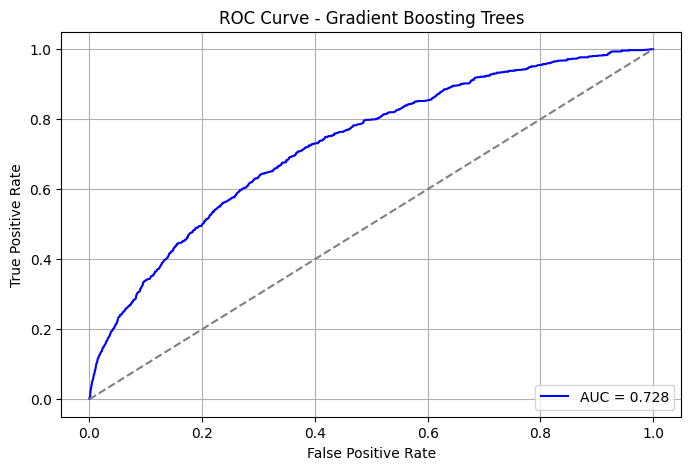

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pyspark.sql.functions import col

# Step 1: Extract Probability & Label Columns
roc_df = test_predictions.select("label", "probability")

# Step 2: Convert Spark DataFrame to Pandas for Plotting
roc_pd = roc_df.toPandas()

# Step 3: Extract Probability of Class 1 (Bankruptcy Prediction)
roc_pd["probability"] = roc_pd["probability"].apply(lambda x: x[1])  # Extract probability of label 1

# Step 4: Sort Values for ROC Curve
roc_pd = roc_pd.sort_values(by="probability", ascending=False)

# Step 5: Compute True Positive Rate (TPR) & False Positive Rate (FPR)
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(roc_pd["label"], roc_pd["probability"])
roc_auc = auc(fpr, tpr)

# Step 6: Plot ROC Curve
plt.figure(figsize=(8,5))
sns.lineplot(x=fpr, y=tpr, label=f"AUC = {roc_auc:.3f}", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Random Classifier Line

# Step 7: Format Plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting Trees")
plt.legend(loc="lower right")
plt.grid(True)

# Show plot
plt.show()


## Phase 5: MLOps Performance Tracking

In [0]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
import mlflow
import mlflow.spark

# Define MLflow Experiment
experiment_name = "/Users/saini50@purdue.edu/MLOps_Final_Project"

# Check if experiment exists, otherwise create
experiment = mlflow.get_experiment_by_name(experiment_name)
if experiment is None:
    mlflow.create_experiment(experiment_name)
mlflow.set_experiment(experiment_name)

# Start MLflow Run
with mlflow.start_run():
    print("Logging Metrics in MLflow for Gradient Boost Tree Model...")

    mlflow.log_metric(f"Validation AUC", val_auc)
    mlflow.log_metric(f"Test AUC", test_auc)
    mlflow.log_metric(f"Test Accuracy", test_accuracy)
    mlflow.log_metric(f"Test Precision", test_precision)
    mlflow.log_metric(f"Test Recall", test_recall)
    mlflow.log_metric(f"Test F1-Score", test_f1)

    # Log Model in MLflow
    mlflow.spark.log_model(best_gbt_model, "best_logistic_regression_model")

print("Model Logging Completed.")


Logging Metrics in MLflow for Gradient Boost Tree Model...


2025/03/04 03:03:39 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().


2025/03/04 03:03:41 INFO mlflow.store.artifact.artifact_repo: The progress bar can be disabled by setting the environment variable MLFLOW_ENABLE_ARTIFACTS_PROGRESS_BAR to false
2025/03/04 03:04:03 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: dbfs:/databricks/mlflow-tracking/739362813720781/784736bbf6dd47fd86188d5c70cc9260/artifacts/best_logistic_regression_model/sparkml, flavor: spark), fall back to return ['pyspark==3.5.0']. Set logging level to DEBUG to see the full traceback.


Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

Model Logging Completed.


##Can we cluster companies based on their financial health to identify risk groups?

Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

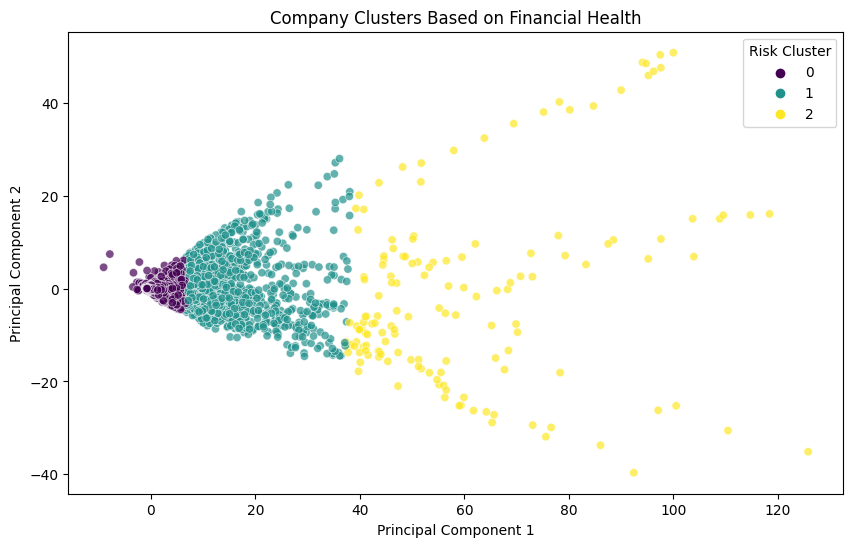

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.sql.functions import col
import pandas as pd
from sklearn.decomposition import PCA

# Step 1: Selecting Key Financial Features
features = [
    "current_assets", "cost_of_goods_sold", "depreciation_and_amortization",
    "ebitda", "inventory", "net_income", "total_receivables", "market_value",
    "net_sales", "total_assets", "total_long_term_debt", "ebit", "gross_profit",
    "total_current_liabilities", "retained_earnings", "total_revenue",
    "total_liabilities", "total_operating_expenses"
]

# Step 2: Handle Missing Values (if any)
bankruptcy_df = bankruptcy_df.na.fill(0)  # Filling NaNs with 0 for simplicity

# Step 3: Assemble Features into a Single Vector
assembler = VectorAssembler(inputCols=features, outputCol="features")
df_transformed = assembler.transform(bankruptcy_df)

# Step 4: Normalize Features for Clustering
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=True)
scaler_model = scaler.fit(df_transformed)
df_scaled = scaler_model.transform(df_transformed)

# Step 5: Train K-Means Model
kmeans = KMeans(featuresCol="scaled_features", k=3, seed=42)  # k=3 for clustering companies into 3 risk groups
model = kmeans.fit(df_scaled)

# Step 6: Assign Cluster Labels
df_clustered = model.transform(df_scaled)

# Step 7: Convert to Pandas DataFrame for Visualization
df_pandas = df_clustered.select("scaled_features", "prediction").toPandas()

# Extract first two principal components for visualization
pca = PCA(n_components=2)  # Reduce to 2 dimensions for plotting
pca_features = pca.fit_transform(list(df_pandas["scaled_features"]))

# Convert to Pandas DataFrame
pca_df = pd.DataFrame(pca_features, columns=["PC1", "PC2"])
pca_df["Cluster"] = df_pandas["prediction"]

# Step 8: Plot Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", palette="viridis", data=pca_df, alpha=0.7)
plt.title("Company Clusters Based on Financial Health")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Risk Cluster")
plt.show()


## REJECTED TRANSFORMATIONS

### Oversampling


In [0]:
# Compute how many times to duplicate the minority class
minority_size = failed_df.count()
majority_size = alive_df.count()
oversample_ratio = (majority_size / minority_size)

# Duplicate the minority class
failed_oversampled_df = failed_df.sample(withReplacement=True, fraction=oversample_ratio, seed=42)

# Combine the oversampled dataset
oversampled_df = failed_oversampled_df.union(alive_df)

# Verify new class distribution
oversampled_df.groupBy("status_label").count().show()


+------------+-----+
|status_label|count|
+------------+-----+
|           0|73578|
|           1|73461|
+------------+-----+



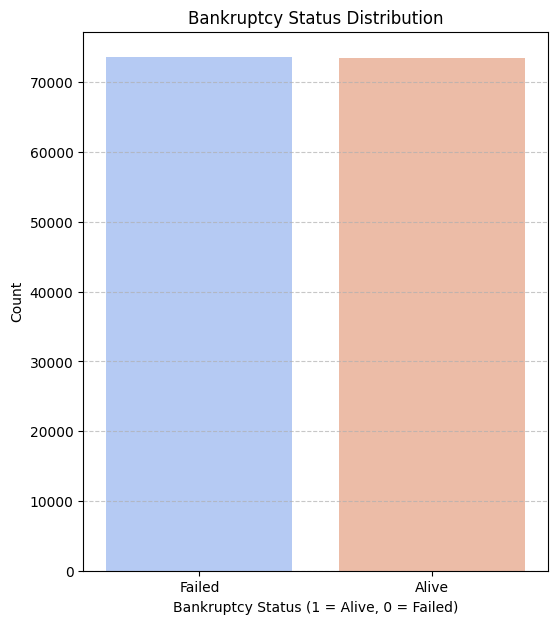

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Spark DataFrame to Pandas for visualization
oversampled_pd = oversampled_df.toPandas()

# Plot the count of each status_label
plt.figure(figsize=(6,7))
sns.barplot(x=oversampled_pd["status_label"].value_counts().index, 
            y=oversampled_pd["status_label"].value_counts().values, 
            palette="coolwarm")

# Labeling
plt.title("Bankruptcy Status Distribution")
plt.xlabel("Bankruptcy Status (1 = Alive, 0 = Failed)")
plt.ylabel("Count")
plt.xticks(ticks=[0,1], labels=["Failed", "Alive"])
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()


### **Impact of Oversampling on Model Performance**  

To address the class imbalance in our bankruptcy prediction dataset, we initially applied **oversampling** to artificially increase the representation of the minority class (bankrupt companies). The intent was to provide the model with more balanced training data, allowing it to better recognize patterns associated with financial distress. However, this approach **negatively impacted overall model accuracy**.  

Oversampling led to **overfitting**, where the model became too specialized in learning from the synthetic minority class examples, reducing its ability to generalize to unseen data. Additionally, since real-world financial distress patterns are often highly complex and nuanced, duplicating minority class records did not introduce new informative variations. Instead, it caused the model to misclassify non-bankrupt firms more frequently, **lowering precision and increasing false positives**.  

As a result, we opted against oversampling and instead chose a more robust approach— **Gradient Boosted Trees (GBT)** —which naturally handles class imbalance by adjusting decision tree weights based on misclassification. This allowed us to improve recall for bankrupt companies while maintaining overall model reliability and accuracy.